In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("fake_job_postings.csv", encoding= "UTF-8")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<AxesSubplot:>

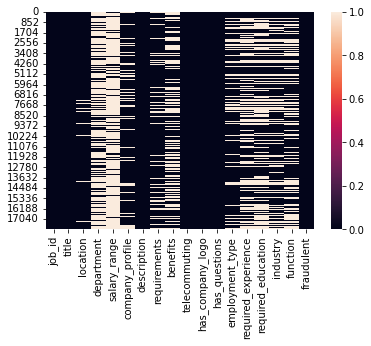

In [5]:
sns.heatmap(df.isnull())

In [6]:
# Drop the columns with too much missing values
df.drop(["department","salary_range"], axis=1, inplace=True)

In [7]:
#Fill the null value with 'Not Applicable'
#Replace the 'Unspecified' with 'Not Applicable'
df.fillna('Not Applicable', inplace=True)
df = df.replace(['Unspecified'], 'Not Applicable')

In [8]:
df.head(50)

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Applicable,0,1,0,Other,Internship,Not Applicable,Not Applicable,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Not Applicable,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Applicable,0,1,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",Not Applicable,Job OverviewApex is an environmental consultin...,Not Applicable,Not Applicable,0,0,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0
6,7,Head of Content (m/f),"DE, BE, Berlin","Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0
8,9,HP BSM SME,"US, FL, Pensacola",Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,Not Applicable,0,1,1,Full-time,Associate,Not Applicable,Information Technology and Services,Not Applicable,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix","Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,Not Applicable,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


Real Job:  17014
Fake Job:  866


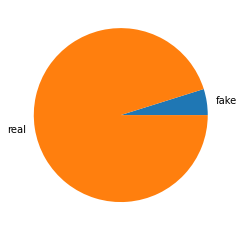

In [9]:
#Check the proportion of fake jobs
real=df[df["fraudulent"]==0]["fraudulent"].count()
fake=df[df["fraudulent"]==1]["fraudulent"].count()
plt.pie([fake,real],labels=["fake","real"])
print('Real Job: ', real)
print('Fake Job: ', fake)

# Numerical Features Selection

<AxesSubplot:>

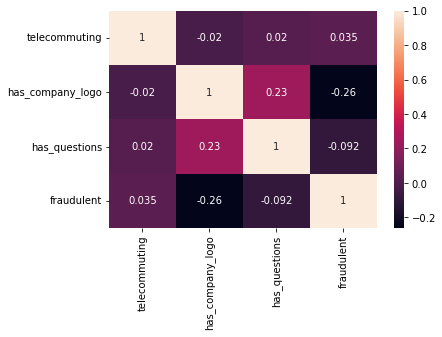

In [10]:
# Correlation matirx for numeric features
sns.heatmap(df[["telecommuting","has_company_logo","has_questions","fraudulent"]].corr(),annot=True)

telecommuting  fraudulent
0              0             16311
               1               802
1              0               703
               1                64
Name: job_id, dtype: int64

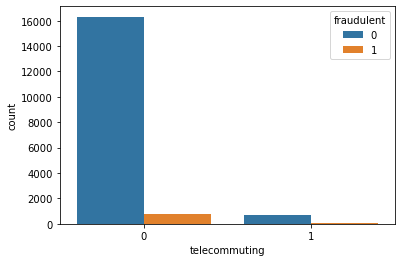

In [11]:
sns.countplot(x="telecommuting",hue="fraudulent",data=df)
df.groupby(['telecommuting', 'fraudulent']).count()["job_id"]

has_company_logo  fraudulent
0                 0              3077
                  1               583
1                 0             13937
                  1               283
Name: job_id, dtype: int64

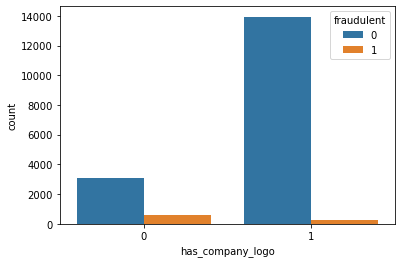

In [12]:
sns.countplot(x="has_company_logo",hue="fraudulent",data=df)
df.groupby(['has_company_logo', 'fraudulent']).count()["job_id"]

has_questions  fraudulent
0              0             8472
               1              616
1              0             8542
               1              250
Name: job_id, dtype: int64

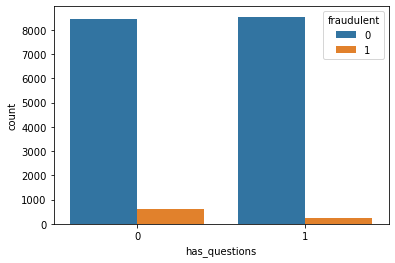

In [13]:
sns.countplot(x="has_questions",hue="fraudulent",data=df)
df.groupby(['has_questions', 'fraudulent']).count()["job_id"]

According to the correlation matrix and distribution of numeric features, 'has_company_logo' has a stronger correlation, so choose 'has_company_logo' as the feature for model.

In [14]:
#Drop no meaningful column
del df['job_id']

# Text Features Selection

Text Features Cleaning

In [15]:
#Check the frequency of fraud jobs in each feature
def frequent(lab,key):
    
    list_of_words = []
    if key == "real":
        f=0
        count = (df['fraudulent']==0).sum()
    else:
        f=1
        count = (df['fraudulent']==1).sum()
    
    for i in (df[lab].loc[df['fraudulent']==f]):
        list_of_words.append((' '.join(dict.fromkeys(i.split()))))

    rand = ' '.join(list_of_words)
    listx = list(rand.split(" "))
    ratiolist = list(pd.Series(listx).value_counts()/count)
    _count = pd.DataFrame(pd.Series(listx).value_counts())
    _count. rename(columns = {_count.columns[0]:'Count'}, inplace = True)
    _count['Probability'] = ratiolist
    print(lab + " of " + key + " applications")
    print(_count.head(20))
    list_of_words.clear()

In [16]:
frequent('location','real')
frequent('location','fake')

location of real applications
           Count  Probability
US,         9868     0.579993
GB,         2353     0.138298
CA,         2351     0.138180
,           2085     0.122546
NY,         1191     0.070001
London      1105     0.064947
LND,         986     0.057952
GR,          937     0.055072
San          829     0.048725
TX,          823     0.048372
New          807     0.047432
York         766     0.045022
I,           688     0.040437
Athens       568     0.033384
Francisco    498     0.029270
IL,          477     0.028036
DE,          398     0.023393
FL,          385     0.022628
IN,          380     0.022335
OH,          354     0.020806
location of fake applications
             Count  Probability
US,            725     0.837182
CA,            155     0.178984
TX,            152     0.175520
Houston         92     0.106236
NY,             68     0.078522
,               57     0.065820
San             57     0.065820
AU,             40     0.046189
MD,             35    

More than 95% jobs are concentrated in US, so we choose the jobs only posted in US

In [17]:
#Select the jobs in US
df = df[df['location'].str.contains("US")]

In [18]:
#Split location to state and city
loc_split =[]
for loc in df.location:
    loc_split.append(loc.split(','))

loc_split = pd.DataFrame(loc_split)

loc_split = loc_split[[1, 2]]

loc_split = loc_split.rename(columns={1: "state", 2:'city'})

In [19]:
df = df.reset_index()
df = df.join(loc_split)

In [20]:
df = df[['title', 'location','company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'state', 'city']]

In [21]:
df = df[df['city'].notna()]
df = df[df['state'].notna()]

In [22]:
#Combine state and city to a new column
df['state_city'] = df['state'] + ", " + df['city']

In [23]:
df.city = df.city.str.strip()
df.state = df.state.str.strip()

In [24]:
df.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city,state_city
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Applicable,0,1,0,Other,Internship,Not Applicable,Not Applicable,Marketing,0,NY,New York,"NY, New York"
1,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Applicable,0,1,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,IA,Wever,"IA, Wever"
2,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington"
3,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth"
4,Accounting Clerk,"US, MD,",Not Applicable,Job OverviewApex is an environmental consultin...,Not Applicable,Not Applicable,0,0,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,MD,,"MD,"


Feature Distribution of Unbalanced Data

In [25]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=df, hue="fraudulent",
              order=df[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    plt.show()

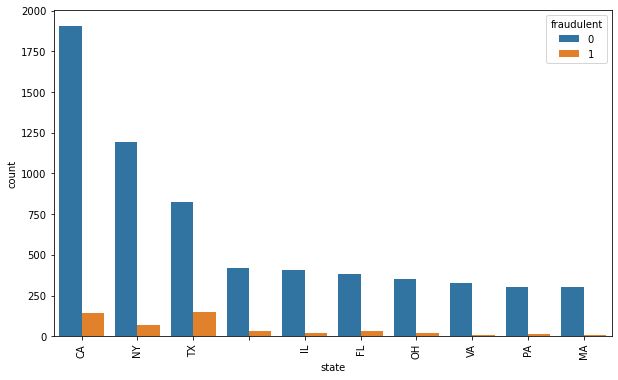

In [26]:
#Distribution in each state
plt.figure(figsize=(10,6))
sns.countplot(x='state', data=df, hue="fraudulent", order=df['state'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

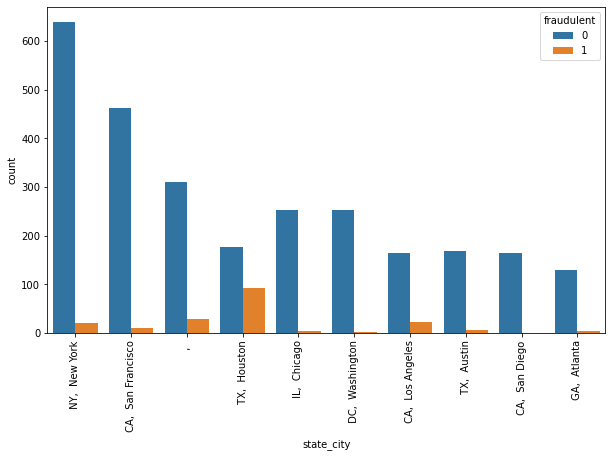

In [27]:
#Distribution in each city of state
plt.figure(figsize=(10,6))
sns.countplot(x='state_city', data=df, hue="fraudulent", order=df['state_city'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

According to the distribution in the above figure, the state distribution is more concentrated, so state can be selected as the feature of the model.

In [28]:
frequent('required_education','real')
frequent('required_education','fake')

required_education of real applications
               Count  Probability
Not             4775     0.483887
Applicable      4775     0.483887
Degree          3420     0.346575
Bachelor's      3058     0.309891
High            1472     0.149169
School          1472     0.149169
or              1468     0.148764
equivalent      1468     0.148764
Associate        212     0.021484
Master's         148     0.014998
Some              81     0.008208
Coursework        81     0.008208
College           77     0.007803
Completed         77     0.007803
Certification     74     0.007499
Professional      22     0.002229
Vocational        17     0.001723
Doctorate         13     0.001317
-                  4     0.000405
HS                 2     0.000203
required_education of fake applications
               Count  Probability
Not              399     0.550345
Applicable       399     0.550345
High             178     0.245517
School           178     0.245517
or               158     0.217931
eq

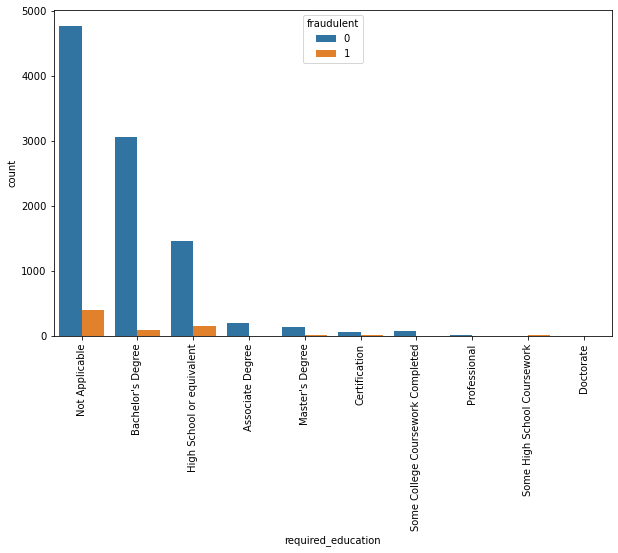

In [29]:
#Distribution of each education requirement 
plt.figure(figsize=(10,6))
sns_countplot('required_education')

In [30]:
frequent('required_experience','real')
frequent('required_experience','fake')

required_experience of real applications
            Count  Probability
Not          4342     0.440008
Applicable   4342     0.440008
level        3689     0.373835
Mid-Senior   1911     0.193656
Entry        1778     0.180178
Associate    1365     0.138326
Director      248     0.025132
Internship    146     0.014795
Executive      78     0.007904
required_experience of fake applications
            Count  Probability
Not           385     0.531034
Applicable    385     0.531034
level         273     0.376552
Entry         170     0.234483
Mid-Senior    103     0.142069
Associate      40     0.055172
Director       17     0.023448
Internship      8     0.011034
Executive       2     0.002759


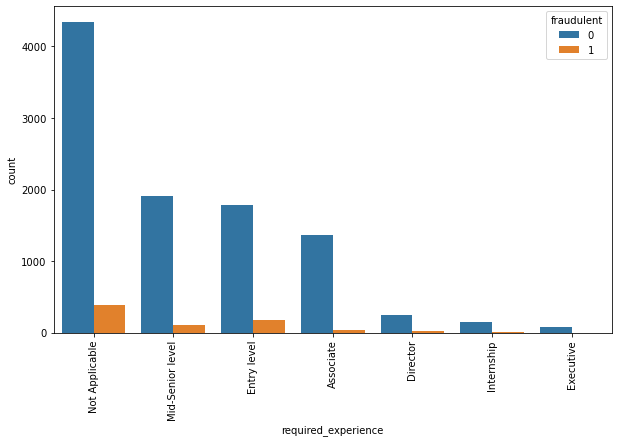

In [31]:
#Distribution of each experience requirement
plt.figure(figsize=(10,6))
sns_countplot('required_experience')

In [32]:
frequent('employment_type','real')
frequent('employment_type','fake')

employment_type of real applications
            Count  Probability
Full-time    6364     0.644913
Not          1566     0.158695
Applicable   1566     0.158695
Contract     1208     0.122416
Part-time     542     0.054925
Other          95     0.009627
Temporary      93     0.009424
employment_type of fake applications
            Count  Probability
Full-time     454     0.626207
Not           188     0.259310
Applicable    188     0.259310
Contract       36     0.049655
Part-time      33     0.045517
Other          12     0.016552
Temporary       2     0.002759


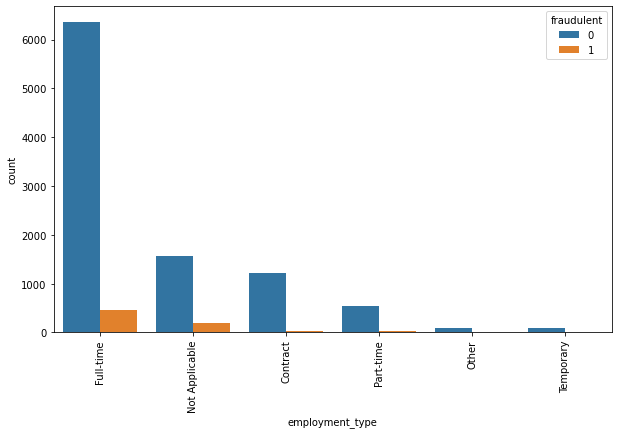

In [33]:
#Distribution of each employment type
plt.figure(figsize=(10,6))
sns_countplot('employment_type')

In [34]:
frequent('function','real')
frequent('function','fake')

function of real applications
                     Count  Probability
Applicable            3644     0.369274
Not                   3644     0.369274
Sales                  914     0.092623
Service                891     0.090292
Customer               891     0.090292
Technology             735     0.074483
Information            735     0.074483
Engineering            583     0.059080
Marketing              380     0.038508
Management             369     0.037394
Education              292     0.029591
Administrative         286     0.028983
Provider               263     0.026652
Care                   263     0.026652
Health                 263     0.026652
Other                  207     0.020977
Business               177     0.017937
Design                 171     0.017329
Accounting/Auditing    110     0.011147
Human                  101     0.010235
function of fake applications
                     Count  Probability
Applicable             245     0.337931
Not                 

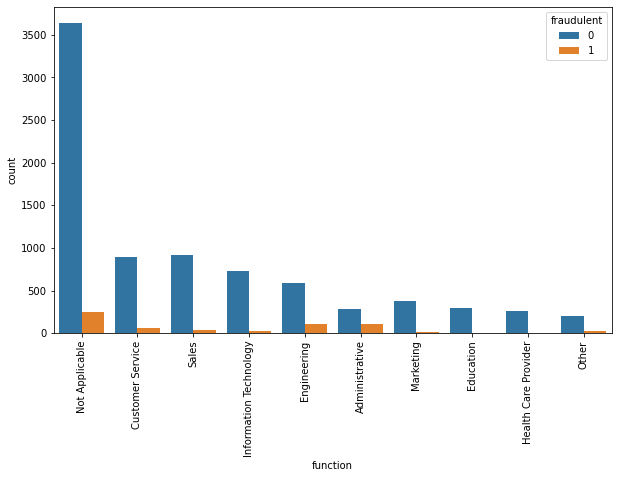

In [35]:
#Distribution of each function
plt.figure(figsize=(10,6))
sns_countplot('function')

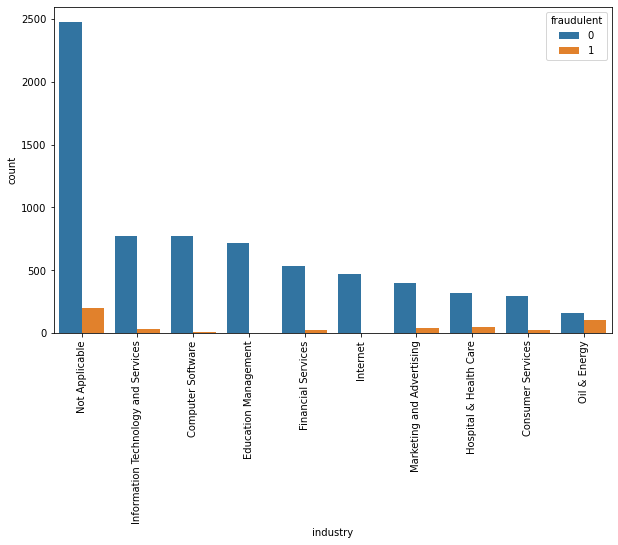

In [36]:
#Distribution of each industry
plt.figure(figsize=(10,6))
sns_countplot('industry')

Features of Balanced Data

In [37]:
df.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city,state_city
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Applicable,0,1,0,Other,Internship,Not Applicable,Not Applicable,Marketing,0,NY,New York,"NY, New York"
1,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Applicable,0,1,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,IA,Wever,"IA, Wever"
2,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington"
3,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth"
4,Accounting Clerk,"US, MD,",Not Applicable,Job OverviewApex is an environmental consultin...,Not Applicable,Not Applicable,0,0,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,MD,,"MD,"


In [38]:
frequent('title','real')
frequent('title','fake')

title of real applications
                Count  Probability
-                1199     0.121504
Manager          1027     0.104074
Engineer          815     0.082590
Sales             806     0.081678
Teacher           716     0.072558
English           692     0.070126
Abroad            666     0.067491
Service           657     0.066579
Customer          646     0.065464
Developer         579     0.058675
Associate         499     0.050567
Senior            392     0.039724
Marketing         369     0.037394
Representative    334     0.033847
Assistant         300     0.030401
Software          299     0.030300
Specialist        298     0.030199
Account           278     0.028172
Director          268     0.027158
and               264     0.026753
title of fake applications
                Count  Probability
Entry              82     0.113103
Data               79     0.108966
Engineer           70     0.096552
-                  60     0.082759
Home               56     0.077241
P

In [39]:
frequent('company_profile','real')
frequent('company_profile','fake')

company_profile of real applications
       Count  Probability
and     7444     0.754358
to      7011     0.710478
the     6401     0.648662
in      6079     0.616032
a       6016     0.609647
of      5551     0.562525
for     5210     0.527969
is      5091     0.515910
We      4646     0.470815
our     4413     0.447203
that    4358     0.441630
are     4173     0.422882
with    4039     0.409303
we      3589     0.363701
on      3383     0.342825
their   2784     0.282124
an      2624     0.265910
Our     2620     0.265505
help    2376     0.240778
have    2332     0.236319
company_profile of fake applications
            Count  Probability
Not           467     0.644138
Applicable    467     0.644138
and           254     0.350345
the           253     0.348966
to            248     0.342069
in            237     0.326897
a             204     0.281379
of            201     0.277241
is            168     0.231724
our           165     0.227586
for           144     0.198621
Our     

In [40]:
frequent('description','real')
frequent('description','fake')

description of real applications
      Count  Probability
and    8927     0.904641
to     8745     0.886198
of     8735     0.885184
in     8640     0.875557
for    8484     0.859749
the    8212     0.832185
a      7895     0.800061
with   7864     0.796919
is     6461     0.654743
our    5479     0.555229
are    5439     0.551176
will   5202     0.527158
be     5126     0.519457
on     4979     0.504560
as     4781     0.484495
an     4754     0.481759
that   4184     0.423997
work   3845     0.389643
all    3814     0.386502
or     3622     0.367045
description of fake applications
      Count  Probability
and     695     0.958621
to      655     0.903448
a       618     0.852414
the     588     0.811034
in      578     0.797241
of      576     0.794483
for     559     0.771034
with    547     0.754483
is      485     0.668966
are     411     0.566897
work    381     0.525517
on      357     0.492414
be      348     0.480000
from    305     0.420690
as      305     0.420690
We      3

In [41]:
frequent('requirements','real')
frequent('requirements','fake')

requirements of real applications
               Count  Probability
and             6787     0.687779
to              6160     0.624240
in              6011     0.609141
of              5948     0.602756
a               5707     0.578334
with            5385     0.545703
or              5299     0.536988
experience      5281     0.535164
the             4325     0.438285
work            3382     0.342724
years           3299     0.334313
for             3250     0.329347
be              2704     0.274017
communication   2575     0.260944
skills          2521     0.255472
is              2392     0.242400
as              2342     0.237333
degree          2195     0.222436
have            2094     0.212201
ability         2094     0.212201
requirements of fake applications
               Count  Probability
and              470     0.648276
to               431     0.594483
in               353     0.486897
with             351     0.484138
of               324     0.446897
a             

In [42]:
frequent('benefits','real')
frequent('benefits','fake')

benefits of real applications
             Count  Probability
Not           4349     0.440717
Applicable    4340     0.439805
and           3366     0.341103
a             2413     0.244528
to            2298     0.232874
of            2151     0.217977
with          1977     0.200345
the           1959     0.198520
for           1735     0.175821
in            1595     0.161634
benefits      1489     0.150892
is            1318     0.133563
an            1279     0.129611
We            1169     0.118464
our           1154     0.116944
on             974     0.098703
work           956     0.096879
we             944     0.095663
paid           940     0.095257
competitive    939     0.095156
benefits of fake applications
             Count  Probability
Not            298     0.411034
Applicable     298     0.411034
and            297     0.409655
to             189     0.260690
a              180     0.248276
with           179     0.246897
of             157     0.216552
for         

In [43]:
#Combine the balanced text features
df['text_features']=df['title']+" "+df['company_profile']+" "+df['description']+" "+df['requirements']+" "+df['benefits'] 

del df['title']
del df['location']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['city']
del df['state_city']

In [44]:
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,text_features
0,0,1,0,Other,Internship,Not Applicable,Not Applicable,Marketing,0,NY,"Marketing Intern We're Food52, and we've creat..."
1,0,1,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,IA,Commissioning Machinery Assistant (CMA) Valor ...
2,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Account Executive - Washington DC Our passion ...
3,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Bill Review Manager SpotSource Solutions LLC i...
4,0,0,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,MD,Accounting Clerk Not Applicable Job OverviewAp...


In [45]:
#Clean the text column
import re

df['text_features'] = df['text_features'].str.replace('\n',' ')
df['text_features'] = df['text_features'].str.replace('\r',' ')
df['text_features'] = df['text_features'].str.replace('\t',' ')
df['text_features'] = df['text_features'].apply(lambda x: re.sub(r'[0-9]',' ',x))
df['text_features'] = df['text_features'].apply(lambda x: re.sub(r'[/(){}\[\]\|@,;.:-]',' ',x))
df['text_features'] = df['text_features'].apply(lambda s:s.lower() if type(s) == str else s)
df['text_features'] = df['text_features'].str.replace('  ',' ')

In [46]:
#Filter out useless data
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
df['text_features'] = df['text_features'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

df['text_features'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    marketing intern we're food we've created grou...
1    commissioning machinery assistant cma valor se...
2    account executive washington dc passion improv...
3    bill review manager spotsource solutions llc g...
4    accounting clerk applicable job overviewapex e...
Name: text_features, dtype: object

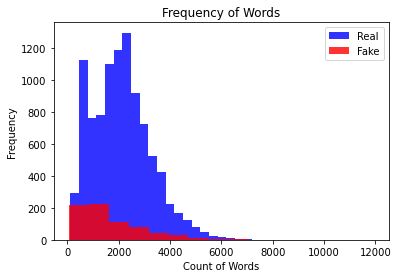

In [47]:
#Count words as new column
#Distribution of words count in each text
df['words_count'] = df.text_features.apply(len)

df[df.fraudulent==0].words_count.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
df[df.fraudulent==1].words_count.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words')
plt.xlabel("Count of Words");

In [48]:
#Label for each words_count range
replace_words_count = {'1':1000, '2':2000, '3':3000, '4':4000, '5':5000, '6':6000, '7':7000, '8':8000, '9':9000}
df['words_mapped'] = pd.cut(df['words_count'],
                      bins=[1]+list(replace_words_count.values()),
                      labels=list(replace_words_count.keys()))

In [49]:
#Only maintain the features for model
del df['text_features']
del df['telecommuting']
del df['has_questions']

df.head()

,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,state,words_count,words_mapped
0,1,Other,Internship,Not Applicable,Not Applicable,Marketing,0,NY,2070,3
1,1,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,IA,2068,3
2,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,4498,5
3,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,3283,4
4,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,MD,2776,3


# Assign Number to Text Features

In [50]:
from sklearn import preprocessing

num = preprocessing.LabelEncoder()
for i in df.columns:
    num.fit(df[i])
    df[i]=num.transform(df[i])

In [51]:
df.head()

,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,state,words_count,words_mapped
0,1,3,4,6,84,22,0,35,1582,2
1,1,2,6,6,84,23,0,13,1580,2
2,1,1,5,1,22,32,0,8,3352,4
3,1,1,5,1,50,16,0,10,2685,3
4,0,2,6,6,84,23,0,21,2256,2


In [52]:
#Save the cleaned data
df.to_csv('df_cleaned.csv')